# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

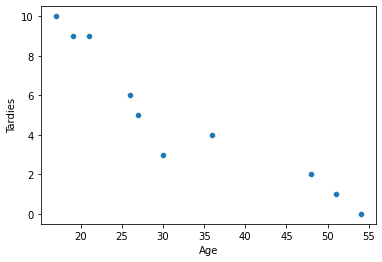

In [3]:
sns.scatterplot(x= "Age", y= "Tardies",data = student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Si, existe una tendencia en la cual cuanto más joven eres más tarde llegas.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

<AxesSubplot:>

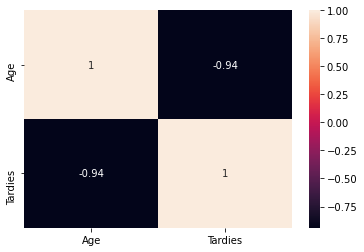

In [4]:
correlacion = student_data.corr().round(2)
sns.heatmap(data = correlacion, annot = True)

<AxesSubplot:>

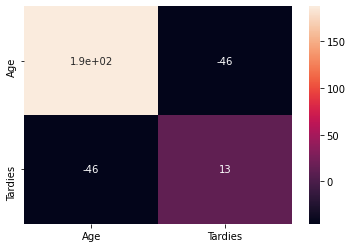

In [5]:
covarianza = student_data.cov().round(2)
sns.heatmap(data = covarianza, annot = True)

La covarianza te indica la dirección de las variable (en este caso negativa), mientras que la correlación nos mide la relación entre ambas variables. Para nuestro dataframe es una covarianza negativa, en el cual ambas variables están muy relacionadas (cerca de -1).

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
lr = LinearRegression()
lr.fit(
    X = student_data[["Age"]], 
    y = student_data.Tardies
    )

beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
student_data["Prediction"] = (student_data.Age * beta_1 + beta_0)
student_data

,Age,Tardies,Prediction
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

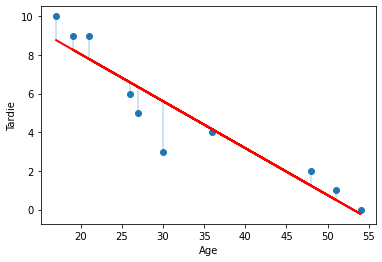

In [7]:
X = student_data[["Age"]]
y = student_data.Tardies
y_hat = beta_0 + beta_1 * X
plt.scatter(X,y)
plt.plot(X, y_hat, color = "r", lw=2)
plt.vlines(X, y_hat, y, lw = 0.4)
plt.xlabel("Age")
plt.ylabel("Tardie")
plt.show

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
results = smf.ols("Tardies ~ Age", data=student_data).fit()
results.summary()

/Users/edu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        21:03:56   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tiene una R-square bastante alta lo que significa que nuestro módelo es muy acertado, además de un P-value por debajo de 0,05

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
df = pd.read_csv("vehicles.csv")
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
df_car = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
df_car.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


<AxesSubplot:>

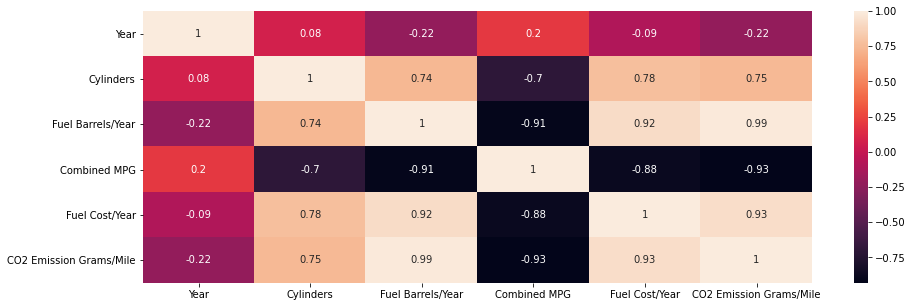

In [11]:
correlacion = df_car.corr().round(2)
plt.figure(figsize=(15, 5))
sns.heatmap(data = correlacion, annot = True)

La variable que menos correlación tiene con CO2 emision es el Año. Es decir, que independientemente de que año sea no se ve afectada.
La variable que más correlación tiene es Fuel Barrels/Year, aunque hay 2 más que también tienen casi la misma correlación (Combined MPG y Fuel Cost/Year)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
co2 = df_car['CO2 Emission Grams/Mile']
cylinders = df_car['Cylinders']
fby = df_car['Fuel Barrels/Year']
fcy = df_car['Fuel Cost/Year']
year = df_car['Year']
mpg = df_car['Combined MPG']

results = smf.ols('co2  ~ cylinders + fby + fcy + year + mpg', data = df_car).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:03:57   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    769.8883     19.392     39.702      0.000     731.880     807.897
cylinders      1.8788      0.083     22.598      0.000       1.716       2.042
fby           19.0529      0.061    311.600      0.000      18.933      19.173
fcy            0.0323      0.000     67.025      0.000       0.031       0.033
year          -0.3206      0.010    -33.060      0.000      -0.340      -0.302
mpg           -3.0404      0.042    -71.645      0.000      -3.124      -2.957
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Estamos usando una regresión lineal múltiple, en la cual la R_squared es bastante significativa y la variable más importante sería la de Fuel Barrers/Year por su coeficiente (aunque no sabría aclarar del todo a que se debe).

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
party= pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [14]:
lr.fit(
    X = party[["X"]], 
    y = party.Y
    )

beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

<function matplotlib.pyplot.show(close=None, block=None)>

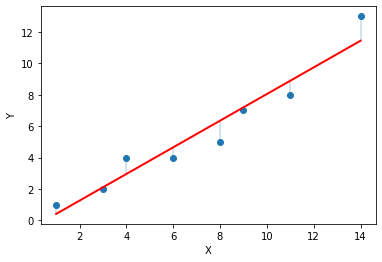

In [15]:
X = party[["X"]]
y = party.Y
y_hat = beta_0 + beta_1 * X
plt.scatter(X,y)
plt.plot(X, y_hat, color = "r" ,lw=2)
plt.vlines(X, y_hat, y, lw = 0.4)
plt.xlabel("X")
plt.ylabel("Y")
plt.show

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

<AxesSubplot:>

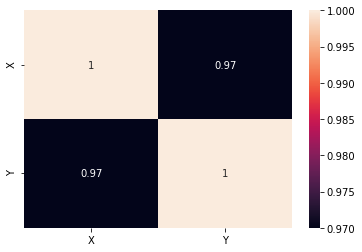

In [20]:
covarianza = party.corr().round(2)
sns.heatmap(data = covarianza, annot = True)

In [21]:
results = smf.ols('Y  ~ X', data = party).fit()
results.summary()

/Users/edu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           0.000102
Time:                        21:11:00   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Por lo que se ve en el gráfico y por su correlación positiva y cercana al 1, podemos concluir que cuantas más personas invitas mayor es el número de personas que asisten.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [17]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [18]:
# Your response here. 